### Zonal Make Raster

Using the output from zone_statistics__poly_example.ipynb and a matching polygon grid, we can create a new raster with the new cell values

first, let's import some modules, including zonepy

In [6]:
import os, sys
sys.path.append('../')
import zonepy as zp

Next, we'll assign variables for the location of our point feature class (and the layer name within the feature class, which in this case is in a geopackage), the raster, and the output filename

In [7]:
gdb = os.path.join('data', 'zone10km.gpkg')
ras = os.path.join('data', 'zone10kmCellNum.tif')
lyrName = 'modelgrid'
inputfile = os.path.join('data', 'outputfilepoly.csv')
outTiff = os.path.join('data', 'statRaster.tif')

Now we instantiate our class by passing ZoneClass the required variables defined above.

In [8]:
zc = zp.ZoneClass(gdb, ras, lyrName=lyrName, fldname=None , 
              buffDist=0, cmap=None, fact=30, 
              filenm=None)

In [9]:
zc.writeRaster(outTiff=outTiff, inputfile=inputfile)

writing tiff...


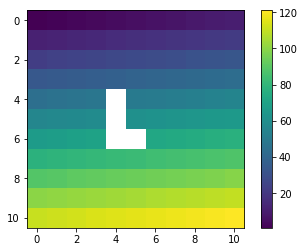

In [10]:
from osgeo import gdal
import matplotlib.pyplot as plt
%matplotlib inline

r = gdal.Open(outTiff)
b = r.GetRasterBand(1).ReadAsArray()
plt.imshow(b)
plt.colorbar()
plt.show()